# Lab 9 - Linear Models - Part 1

In [1]:
% matplotlib inline

UsageError: Line magic function `%` not found.


This will make all the `matplotlib` images appear in the notebook.

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import models
sns.set(style="whitegrid")

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

## Synthetic Data

It's very important to understand the underlying data generated by the model you're building and to understand how the algorithm you're using to build the model works. Both of these ends can be accomplished by generating synthetic data and then trying to see if you can recover the "correct" model you used to generate the data.

Generate the following synthetic data sets and model them with the appropriate linear model from the chapter. You can also refer to the chapter to see how to generate the synthetic data (as well as previous labs).

For each of these, save a different random seed. *You may wish to develop each of these models in a separate notebook and then copy them, when done, into your final Lab notebook.*

**Linear Regression**

1. Generate a model $\beta_0 + \beta_1 x_1$ where $x_1 ~ N(50.0, \sigma)$. Pick your own $\beta_0$ and $\beta_1$ but chose $\sigma$ so that the $R^2$ is around 0.60.
2. Generate a model $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$ where $x_1 ~ N(50.0, \sigma)$ and $x_2 ~ Bernouilli(p)$. Pick your own $\beta_i$ and $p$ but pick $\sigma$ so that $R^2$ is around 0.8.
3. Create a model of your own choosing that explores a relationship or concept that you're curious about (for example, how do $\sigma$ and $R^2$ relate?)


**Logistic Regression**

1. Generate a model $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$ where $x_1 ~ N(50.0, 5.0)$ and $x_2 ~ Bernouilli(0.67)$. Pick your own $\beta_i$ but try to get the error rate to be 15% or lower.
2. Create a model of your own choosing that explores a relationship or concept that you're curious about.

For each of these, you may use the "normal" versions of the functions (non-bootstrap) to explore the problem and parameters but your final model should be the bootstrap version.

**Group Discussion** Share *one* model with your group that you think is particularly interesting or surprising.

**Linear Regression**

1. Generate a model $\beta_0 + \beta_1 x_1$ where $x_1 ~ N(50.0, \sigma)$. Pick your own $\beta_0$ and $\beta_1$ but chose $\sigma$ so that the $R^2$ is around 0.60.

In [3]:
np.random.seed(19921102)

In [4]:
data = {}
data["x"] = stats.norm.rvs(50.0, 1, 100)
data["e"] = stats.norm.rvs(0, 2, 100)
data["y"] = 13 + data["x"] * 3 + data["e"]
data = pd.DataFrame(data)

In [5]:
result = models.bootstrap_linear_regression("y ~ x", data=data)
models.describe_bootstrap_lr(result)

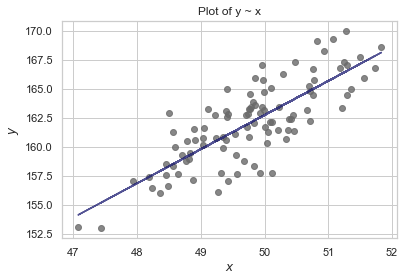

In [6]:
figure = plt.figure(figsize=(6,4))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(data.x, data.y, color="dimgray", alpha=0.8)

beta = result[ "coefficients"]
axes.plot(data.x, [beta[ 0] + beta[ 1] * x for x in data.x], '-', color="midnightblue", alpha=0.75)

axes.set_ylabel(r"$y$")
axes.set_xlabel(r"$x$")
axes.set_title("Plot of {0}".format(result['formula']))

plt.show()
plt.close()

2. Generate a model $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$ where $x_1 ~ N(50.0, \sigma)$ and $x_2 ~ Bernouilli(p)$. Pick your own $\beta_i$ and $p$ but pick $\sigma$ so that $R^2$ is around 0.8.

In [7]:
np.random.seed(19921102)

In [8]:
data2 = {}
data2["x1"] = stats.norm.rvs(50, 1,100)
data2["x2"] = [1 if v < 0.8 else 0 for v in stats.uniform.rvs(0, 1, 100)]
data2["x1x2"] = [13+x1*3 if x2 == 0 else 18 + x1*3+x2*5+x1*x2*6 for x1, x2 in zip(data2["x1"], data2["x2"])]
data2["e"] = stats.norm.rvs(0, 50, 100)
data2["y"] = data2["x1x2"] + data2["e"]
data2 = pd.DataFrame(data2)


In [9]:
results = models.bootstrap_linear_regression("y ~ x1 + x2 + x1:x2", data = data2)
models.describe_bootstrap_lr(results)

3. Create a model of your own choosing that explores a relationship or concept that you're curious about (for example, how do $\sigma$ and $R^2$ relate?)

I would like to see how adding a variable change the relationship between standard deviation and R^2

In [10]:
np.random.seed(19921102)

In [11]:
data3 = {}
data3["x1"] = stats.norm.rvs(50.0, 1, 100)
data3["x2"] = stats.norm.rvs(80.0, 1, 100)
data3["e"] = stats.norm.rvs(0, 11, 100)
data3["y"] = 13 + data3["x1"] * 3 + data3["x2"] * 12 + data3["e"]
data3 = pd.DataFrame(data3)

In [12]:
result = models.bootstrap_linear_regression("y ~ x1 + x2", data=data3)
models.describe_bootstrap_lr(result)

With one more variable, standard deviation of error term has to increase from 2 to 11 to reach similar R^2 compared to question 1

**Logistic Regression**

In [13]:
def logistic( z):
    return 1.0 / (1.0 + np.exp( -z))

1. Generate a model $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$ where $x_1 ~ N(50.0, 5.0)$ and $x_2 ~ Bernouilli(0.67)$. Pick your own $\beta_i$ but try to get the error rate to be 15% or lower.

In [14]:
np.random.seed(19921102)

In [15]:
data = {}
data["x1"] = stats.norm.rvs(50, 5,100)
data["x2"] = [1 if v < 0.67 else 0 for v in stats.uniform.rvs(0, 1, 100)]
data["x1x2"] = [0.13+x1*0.03 if x2 == 0 else 0.18 + x1*0.03+x2*0.05+x1*x2*0.06 for x1, x2 in zip(data["x1"], data["x2"])]
data["p"] = list(map(lambda x1x2: logistic(x1x2), data["x1x2"]))
data["y"] = list(map(lambda p: 1 if np.random.uniform() < p else 0, data["p"]))
data = pd.DataFrame(data)


In [16]:
result = models.logistic_regression("y ~ x1 + x2 + x1:x2", data = data)
models.simple_describe_lgr(result)

C:\Users\guany\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2. Create a model of your own choosing that explores a relationship or concept that you're curious about.

In [17]:
data = {}
data["x"] = stats.norm.rvs(0, 1, 10000)
data["z"] = 3 + data["x"] * 13
data["p"] = list(map(lambda z: logistic(z), data["z"]))
data["y"] = list(map(lambda p: 1 if np.random.uniform() < p else 0, data["p"]))
data = pd.DataFrame(data)

In [18]:
result = models.logistic_regression("y ~ x", data = data)
models.simple_describe_lgr(result)

C:\Users\guany\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
